<a href="https://colab.research.google.com/github/ander-yamamoto/dio-bairesdev/blob/main/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

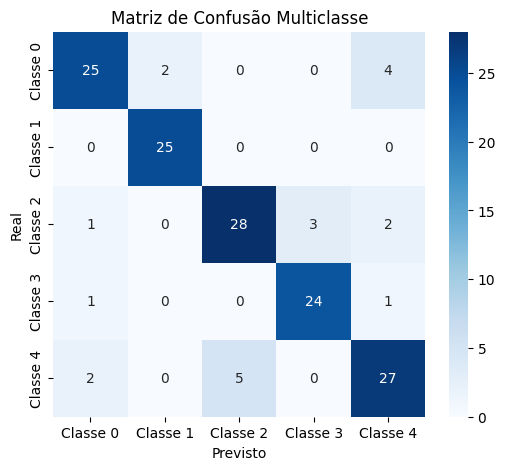

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Criar dataset com 3 classes
classes = 5
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_classes=classes,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treinar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 4. Prever
y_pred = modelo.predict(X_test)

# 5. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# 6. Visualizar
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Classe {i}" for i in range(classes)],
            yticklabels=[f"Classe {i}" for i in range(classes)])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Multiclasse")
plt.show()


In [4]:
for c in range(classes):
  print(f"Classe {c}:")

  VP = cm[c,c]
  FN = cm[:,c].sum() - VP
  FP = cm[c,:].sum() - VP
  VN = cm.sum().sum() - VP - FN - FP

  print(f"Sensibilidade: {VP/(VP+FN)}")
  print(f"Especificidade: {VN/(VN+FP)}")
  print(f"Acurácia: {(VP+VN)/(VP+VN+FP+FN)}")
  print(f"Precisão: {VP/(VP+FP)}")
  print(f"F1: {2*VP/(2*VP+FP+FN)}\n\n")



Classe 0:
Sensibilidade: 0.8620689655172413
Especificidade: 0.9504132231404959
Acurácia: 0.9333333333333333
Precisão: 0.8064516129032258
F1: 0.8333333333333334


Classe 1:
Sensibilidade: 0.9259259259259259
Especificidade: 1.0
Acurácia: 0.9866666666666667
Precisão: 1.0
F1: 0.9615384615384616


Classe 2:
Sensibilidade: 0.8484848484848485
Especificidade: 0.9487179487179487
Acurácia: 0.9266666666666666
Precisão: 0.8235294117647058
F1: 0.835820895522388


Classe 3:
Sensibilidade: 0.8888888888888888
Especificidade: 0.983739837398374
Acurácia: 0.9666666666666667
Precisão: 0.9230769230769231
F1: 0.9056603773584906


Classe 4:
Sensibilidade: 0.7941176470588235
Especificidade: 0.9396551724137931
Acurácia: 0.9066666666666666
Precisão: 0.7941176470588235
F1: 0.7941176470588235


